In [1]:
import os

os.environ["HUGGINGFACE_HUB_CACHE"] = "/data/sshadmin/bocheng/.cache/huggingface/hub/"

In [2]:
from diffusers import StableDiffusionPipeline, UniPCMultistepScheduler
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", use_safetensors=True
)
pipe.scheduler=UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "UniPCMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/20 [00:00<?, ?it/s]

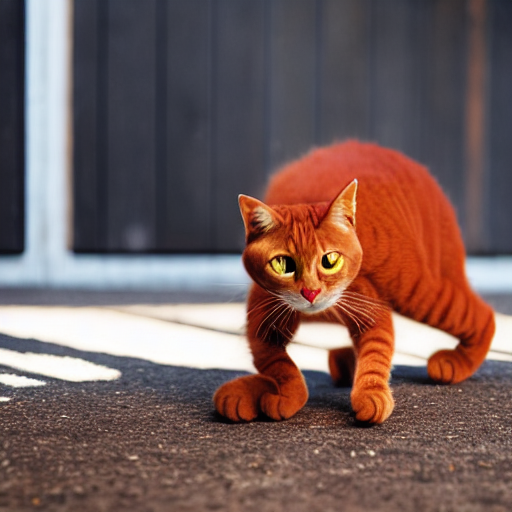

In [3]:
prompt = "a red cat playing with a ball"
generator=torch.Generator(device="cpu").manual_seed(33)
image=pipe(prompt,generator=generator,num_inference_steps=20).images[0]
image

In [4]:
from compel import Compel

In [5]:
compel_proc=Compel(tokenizer=pipe.tokenizer,text_encoder=pipe.text_encoder)

In [6]:
prompt="a red cat playing with a ball++"
prompt_embeds=compel_proc(prompt)
generator=torch.manual_seed(33)
image=pipe(prompt_embeds=prompt_embeds,generator=generator,num_inference_steps=20).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

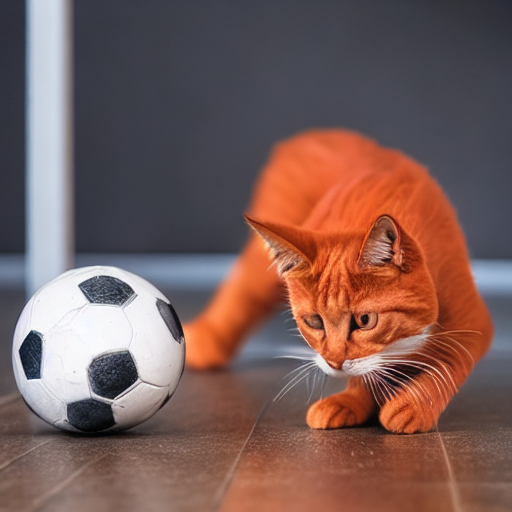

In [7]:
image

  0%|          | 0/20 [00:00<?, ?it/s]

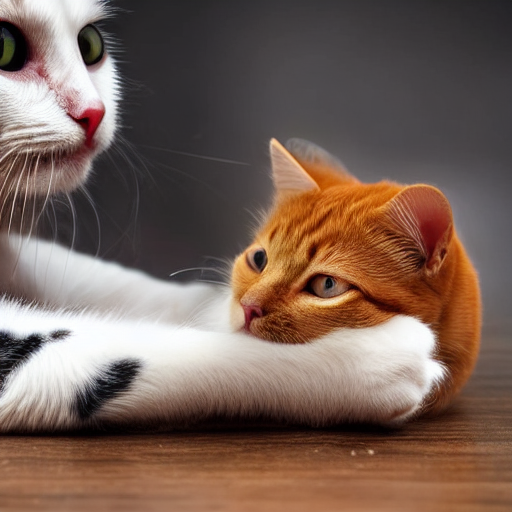

In [8]:
prompt = "a red------- cat playing with a ball"
prompt_embeds = compel_proc(prompt)

generator = torch.manual_seed(33)

image = pipe(
    prompt_embeds=prompt_embeds, generator=generator, num_inference_steps=20
).images[0]
image

  0%|          | 0/20 [00:00<?, ?it/s]

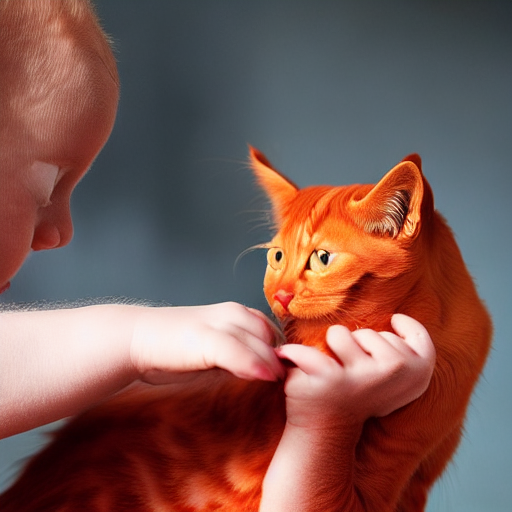

In [9]:
prompt = "a red cat++ playing with a ball----"
prompt_embeds = compel_proc(prompt)

generator = torch.manual_seed(33)

image = pipe(
    prompt_embeds=prompt_embeds, generator=generator, num_inference_steps=20
).images[0]
image

  0%|          | 0/20 [00:00<?, ?it/s]

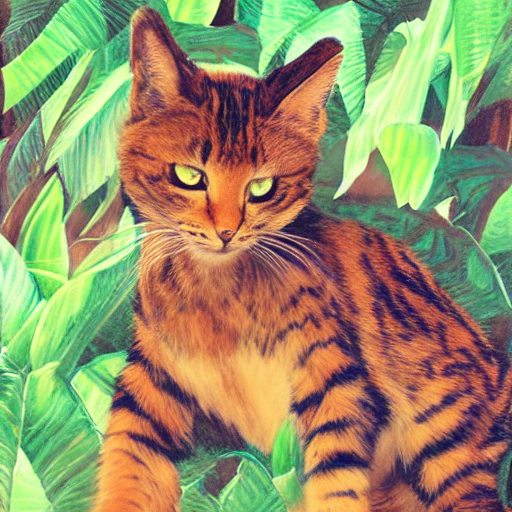

In [10]:
prompt_embeds = compel_proc(
    '("a red cat playing with a ball", "jungle").blend(0.7, 0.8)'
)
generator = torch.Generator(device="cuda").manual_seed(33)

image = pipe(
    prompt_embeds=prompt_embeds, generator=generator, num_inference_steps=20
).images[0]
image

  0%|          | 0/20 [00:00<?, ?it/s]

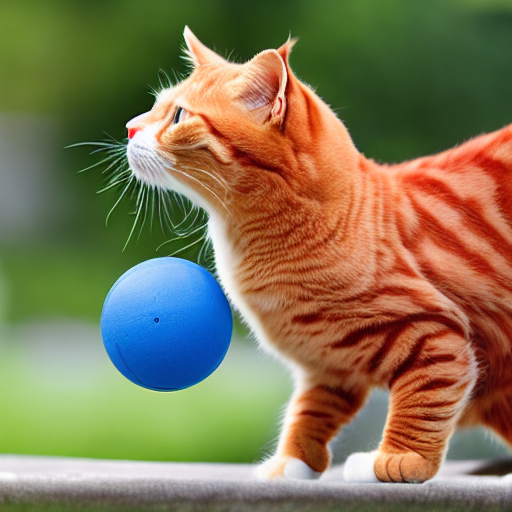

In [11]:
prompt_embeds = compel_proc('["a red cat", "playing with a", "ball"].and()')
generator = torch.Generator(device="cuda").manual_seed(55)

image = pipe(
    prompt_embeds=prompt_embeds, generator=generator, num_inference_steps=20
).images[0]
image

In [12]:
import torch
from diffusers import StableDiffusionPipeline
from compel import Compel, DiffusersTextualInversionManager

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to("cuda")
pipe.load_textual_inversion("sd-concepts-library/midjourney-style")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


learned_embeds.bin:   0%|          | 0.00/3.82k [00:00<?, ?B/s]

In [13]:
import torch
from diffusers import StableDiffusionPipeline
from compel import Compel, DiffusersTextualInversionManager

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to("cuda")
pipe.load_textual_inversion("sd-concepts-library/midjourney-style")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [14]:
textual_inversion_manager=DiffusersTextualInversionManager(pipe)
compel_proc=Compel(
    tokenizer=pipe.tokenizer,
    text_encoder=pipe.text_encoder,
    textual_inversion_manager=textual_inversion_manager
)

  0%|          | 0/50 [00:00<?, ?it/s]

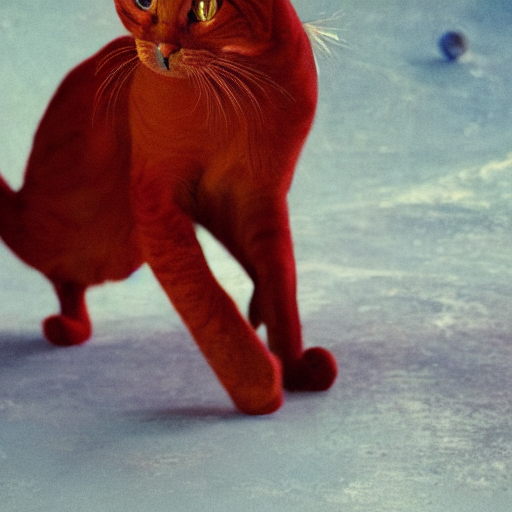

In [15]:
prompt_embeds = compel_proc('("A red cat++ playing with a ball <midjourney-style>")')

image = pipe(prompt_embeds=prompt_embeds).images[0]
image

In [16]:
import torch
from diffusers import DiffusionPipeline, UniPCMultistepScheduler
from compel import Compel

pipe = DiffusionPipeline.from_pretrained(
    "sd-dreambooth-library/dndcoverart-v1", torch_dtype=torch.float16
).to("cuda")
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

model_index.json:   0%|          | 0.00/542 [00:00<?, ?B/s]

text_encoder/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/317 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/data/sshadmin/bocheng/soft/installed/miniconda3/envs/torch/lib/python3.11/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

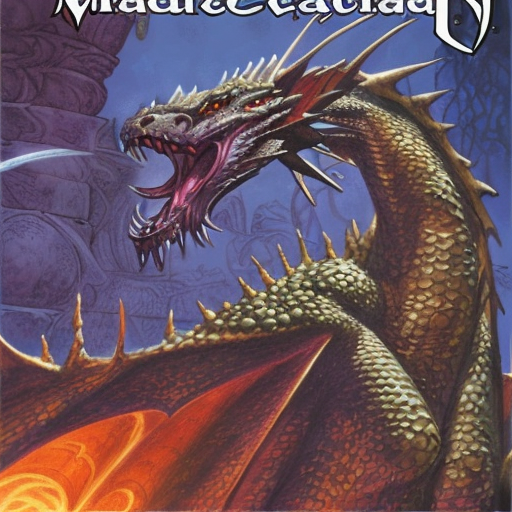

In [17]:
compel_proc = Compel(tokenizer=pipe.tokenizer, text_encoder=pipe.text_encoder)
prompt_embeds = compel_proc(
    '("magazine cover of a dndcoverart dragon, high quality, intricate details, larry elmore art style").and()'
)
image = pipe(prompt_embeds=prompt_embeds).images[0]
image

In [18]:
from compel import Compel, ReturnedEmbeddingsType
from diffusers import DiffusionPipeline
from diffusers.utils import make_image_grid
import torch

pipeline = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    variant="fp16",
    use_safetensors=True,
    torch_dtype=torch.float16,
).to("cuda")

compel = Compel(
    tokenizer=[pipeline.tokenizer, pipeline.tokenizer_2],
    text_encoder=[pipeline.text_encoder, pipeline.text_encoder_2],
    returned_embeddings_type=ReturnedEmbeddingsType.PENULTIMATE_HIDDEN_STATES_NON_NORMALIZED,
    requires_pooled=[False, True],
)

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

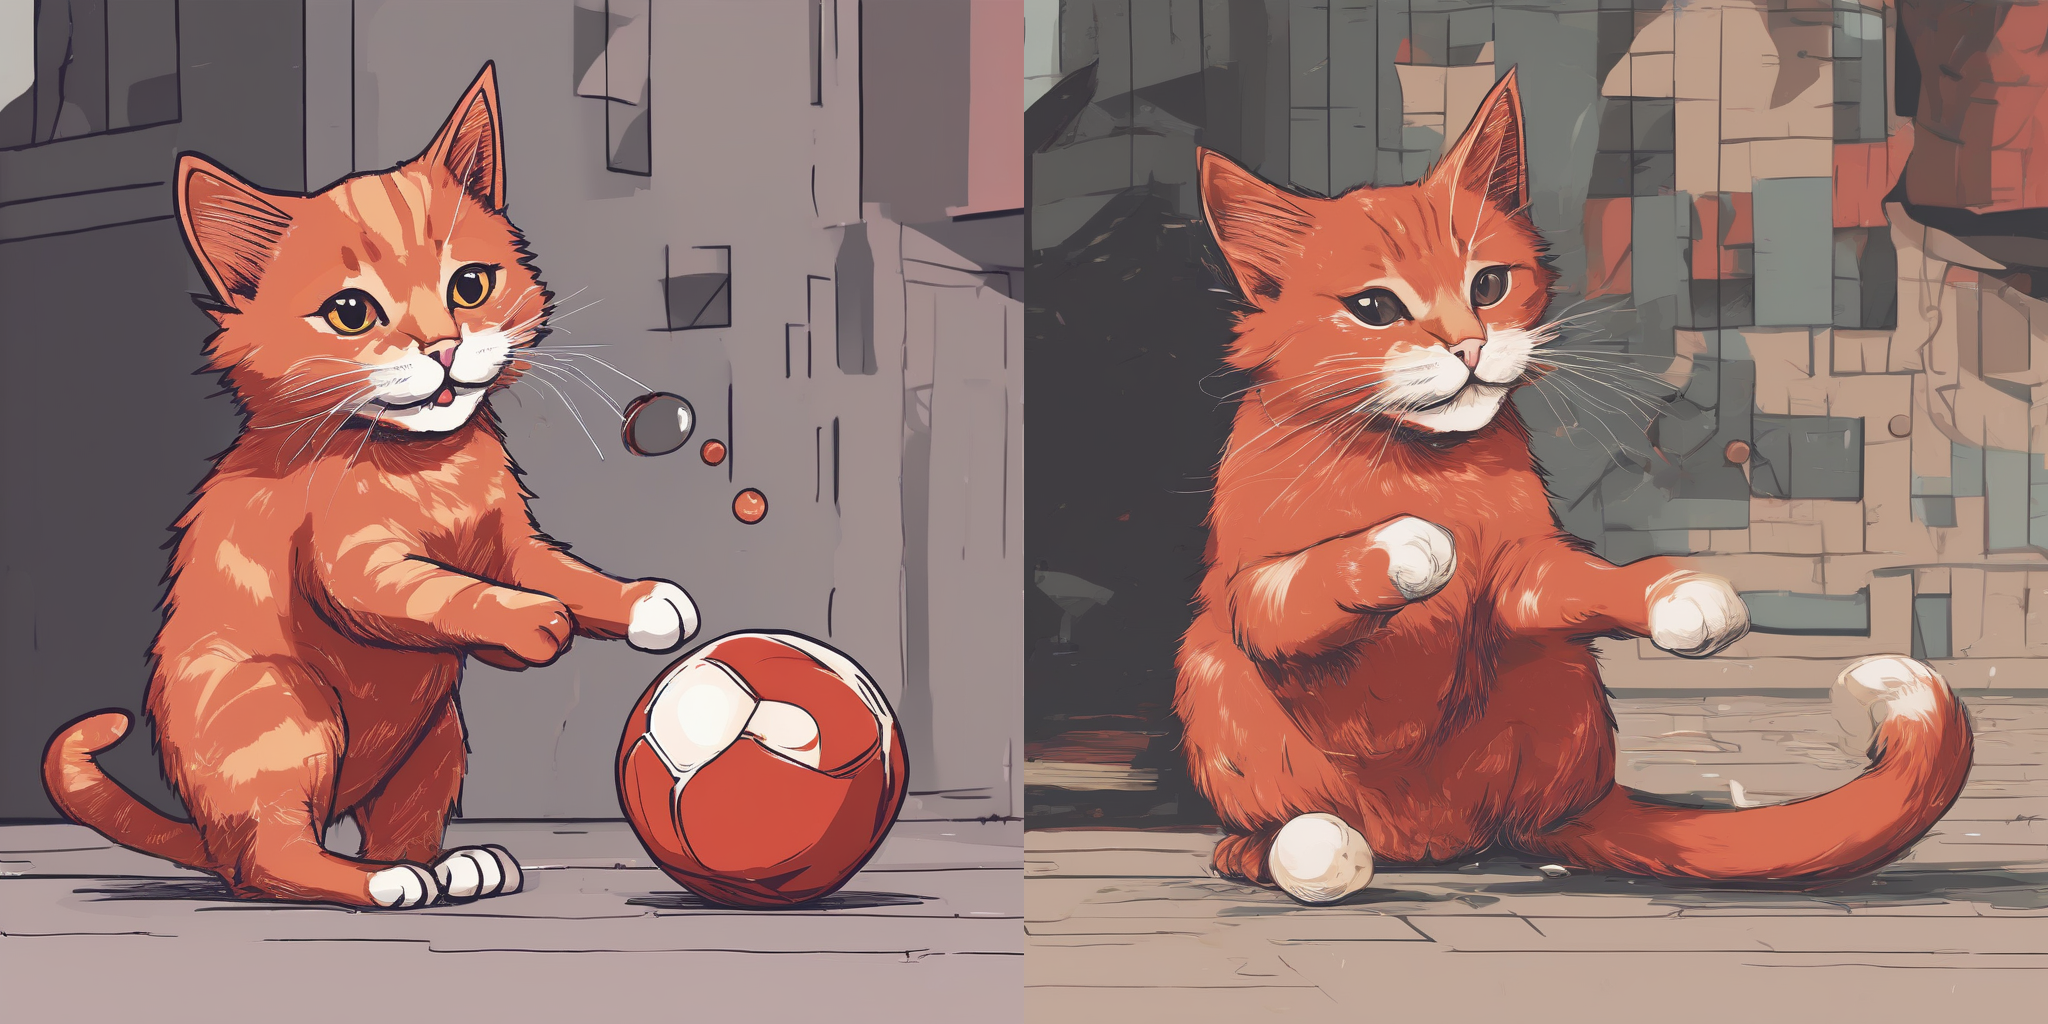

In [19]:
# apply weights
prompt = ["a red cat playing with a (ball)1.5", "a red cat playing with a (ball)0.6"]
conditioning, pooled = compel(prompt)

# generate image
generator = [torch.Generator().manual_seed(33) for _ in range(len(prompt))]
images = pipeline(
    prompt_embeds=conditioning,
    pooled_prompt_embeds=pooled,
    generator=generator,
    num_inference_steps=30,
).images
make_image_grid(images, rows=1, cols=2)